In [29]:
import pandas as pd

url = 'https://raw.githubusercontent.com/\
chrisalbon/simulated_datasets/master/titanic.csv'
df = pd.read_csv(url, index_col='Name')
# df.drop_duplicates().head(2)

In [51]:
# df.shape

In [50]:
# type(df)

In [52]:
# df

In [34]:
duplicates = df[df.duplicated()]
print("Duplicate Rows:\n", duplicates)

Duplicate Rows:
                                        PClass   Age     Sex  Survived  SexCode
Name                                                                          
Bishop, Mrs Dickinson H (Helen Walton)    1st  19.0  female         1        1
Bonnell, Miss Elizabeth                   1st  58.0  female         1        1
Borebank, Mr John James                   1st   NaN    male         0        0
Bradley, Mr George                        1st   NaN    male         1        0
Brewe, Dr Arthur Jackson                  1st   NaN    male         0        0
...                                       ...   ...     ...       ...      ...
Zakarian, Mr Artun                        3rd  27.0    male         0        0
Zakarian, Mr Maprieder                    3rd  26.0    male         0        0
Zenni, Mr Philip                          3rd  22.0    male         0        0
Lievens, Mr Rene                          3rd  24.0    male         0        0
Zimmerman, Leo                     

In [36]:
df.drop_duplicates().head(15)

,PClass,Age,Sex,Survived,SexCode
Name,,,,,
"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
"Allison, Miss Helen Loraine",1st,2.00,female,0,1
"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
"Allison, Master Hudson Trevor",1st,0.92,male,1,0
"Anderson, Mr Harry",1st,47.00,male,1,0
"Andrews, Miss Kornelia Theodosia",1st,63.00,female,1,1
"Andrews, Mr Thomas, jr",1st,39.00,male,0,0
"Appleton, Mrs Edward Dale (Charlotte Lamson)",1st,58.00,female,1,1


In [55]:
# df # The last snippet didn't drop anything

In [45]:
# Show the number of rows
print("Number of rows in the original Dataframe:", len(df))
print("Number of rows after dedupling:", len(df.drop_duplicates()))

# This occured because drop_duplicates only drops rows that match perfectly
# across all columns

Number of rows in the original Dataframe: 1313
Number of rows after dedupling: 355


In [46]:
df.drop_duplicates(subset=['Sex'])

# drop_duplicates defaults to keeping the first occurrence of a
# duplicated row and dropping the rest

,PClass,Age,Sex,Survived,SexCode
Name,,,,,
"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
"Allison, Mr Hudson Joshua Creighton",1st,30.0,male,0,0


In [48]:
df.drop_duplicates(subset=['Sex'], keep='last')

,PClass,Age,Sex,Survived,SexCode
Name,,,,,
"Zabour, Miss Tamini",3rd,NaN,female,0,1
"Zimmerman, Leo",3rd,29.0,male,0,0


In [49]:
# df.duplicated()

In [42]:
# help(df.duplicated)

In [57]:
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt

# number of samples
N=1000

# correlation coefficients
r1 = 0.0
r2 = 0.8

sigma1 = np.array([[1, r1], [r1, 1]])
sigma2 = np.array([[1, r2], [r2, 1]])

B1 = np.linalg.cholesky(sigma1)
B2 = np.linalg.cholesky(sigma2)

x1 = B1 @ randn(2, N)
x2 = B2 @ randn(2, N)

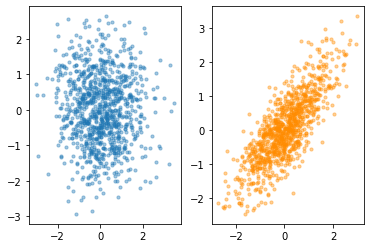

In [102]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.scatter([x1[0, :]], [x1[1, :]], alpha=0.4, s=10)
ax2.scatter([x2[0, :]], [x2[1, :]], alpha=0.4, s=10, c='darkorange')

In [99]:
# plt.scatter([x2[0, :]], [x2[1, :]], alpha=0.4, s = 25)

In [86]:
np.shape(x2)

(2, 1000)

In [84]:
x2[0,:].shape

(1000,)

In [80]:
x2_t = [x2[0,:]]

In [85]:
np.shape(x2_t)

# This is one column transposed

(1, 1000)

In [ ]:
# Acceptance Rejection Method

In [103]:
from math import exp, gamma, log
from numpy.random import rand

In [247]:
alpha = 1.3
lam = 5.6
f = lambda x: lam**alpha * x**(alpha-1) * exp(-lam*x)/gamma(alpha)
g = lambda x: lam*exp(-lam*x)
C = 1.2

N = 10000
my_list = []

while N > 0:
    found = False
    while not found:
        x = -log(rand())/lam
        if C*g(x)*rand() <= f(x):
            found = True
            my_list.append(x)
    N = N - 1

my_values = np.array(my_list)

f_values = np.array(list(map(f, my_values)))
g_values = C*np.array(list(map(g, my_values)))

In [248]:
# my_function
print("The shape of x-values:", np.shape(my_values))
print("The shape of f-values:", np.shape(f_values))
print("The shape of g-values:", np.shape(g_values))

The shape of x-values: (10000,)
The shape of f-values: (10000,)
The shape of g-values: (10000,)


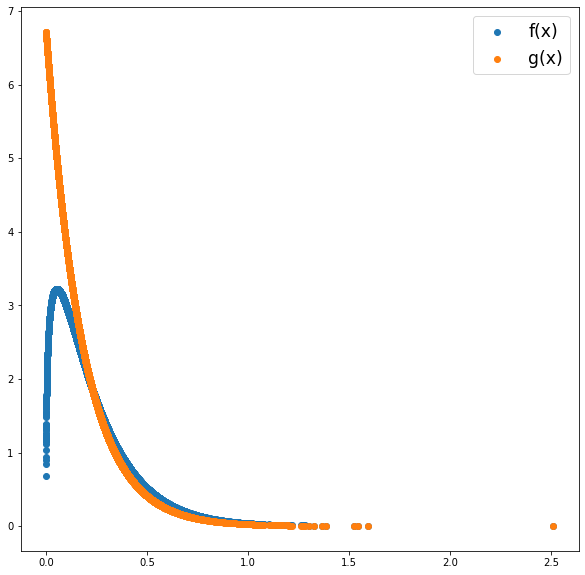

In [261]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(my_values, f_values, label='f(x)')
plt.scatter(my_values, g_values, label='g(x)')
plt.legend(fontsize='xx-large')
